In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import re
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
try:
    from kneed import KneeLocator
except:
    !pip install kneed
    from kneed import KneeLocator
#------------------------------------------------------------------
try:
    from yellowbrick.cluster import KElbowVisualizer
except:
    !pip install -U yellowbrick
    from yellowbrick.cluster import KElbowVisualizer

   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/282.6 kB 660.6 kB/s eta 0:00:01
   -------------------------- ------------- 184.3/282.6 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 282.6/282.6 kB 2.9 MB/s eta 0:00:00


In [2]:
""" READING CSV FILE """
df_bank = pd.read_csv('bank_transactions.csv') 

In [3]:
df_bank.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [5]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [9]:
df_bank.dropna(inplace=True)

In [11]:
df_bank.duplicated().sum()

0

In [13]:

df_bank['TransactionDate'] = pd.to_datetime(df_bank['TransactionDate'])
df_bank['CustomerDOB'] = pd.to_datetime(df_bank['CustomerDOB'])

hghg


C:\Users\hp\AppData\Local\Temp\ipykernel_25504\1257561607.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_bank['TransactionDate'] = pd.to_datetime(df_bank['TransactionDate'])
C:\Users\hp\AppData\Local\Temp\ipykernel_25504\1257561607.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_bank['CustomerDOB'] = pd.to_datetime(df_bank['CustomerDOB'])


In [15]:
df_bank['TransactionDate'] = pd.to_datetime(df_bank['TransactionDate'], errors='coerce')
df_bank['CustomerDOB'] = pd.to_datetime(df_bank['CustomerDOB'], errors='coerce')
print("yyy")
print(df_bank.head())

yyy
  TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053  1994-10-01          F   JAMSHEDPUR   
1            T2   C2142763  2057-04-04          M      JHAJJAR   
2            T3   C4417068  1996-11-26          F       MUMBAI   
3            T4   C5342380  2073-09-14          F       MUMBAI   
4            T5   C9031234  1988-03-24          F  NAVI MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05      2016-02-08           143207   
1             2270.69      2016-02-08           141858   
2            17874.44      2016-02-08           142712   
3           866503.21      2016-02-08           142714   
4             6714.43      2016-02-08           181156   

   TransactionAmount (INR)  
0                     25.0  
1                  27999.0  
2                    459.0  
3                   2060.0  
4                   1762.5  


In [18]:
df_bank['CustomerAge'] =df_bank['TransactionDate'].dt.year - df_bank['CustomerDOB'].dt.year

In [20]:
df_bank.drop(columns=['TransactionTime'],inplace=True)

In [22]:
df_bank.CustGender.value_counts()

CustGender
M    760978
F    280635
T         1
Name: count, dtype: int64

In [24]:
df_bank.drop(df_bank[df_bank['CustGender']=='T'].index,inplace=True)


In [293]:
num_col = df_bank.select_dtypes(include=np.number)
cat_col = df_bank.select_dtypes(exclude=np.number)

In [26]:
#df['TransactionDate1'] ==> I will keep it to do visaulization
df_bank['TransactionDate1']=df_bank['TransactionDate'] # ==> to calculate the minimum (first transaction)
df_bank['TransactionDate2']=df_bank['TransactionDate'] # ==> to calculate the maximum (last transaction)

jjjjggk


In [28]:
RMF_data = df_bank.groupby("CustomerID").agg({
                                        "TransactionID" : "count",
                                        "CustGender" : "first",
                                        "CustLocation":"first",
                                        "CustAccountBalance"  : "mean",
                                        "TransactionAmount (INR)" : "mean",
                                        "CustomerAge" : "max",
                                        "TransactionDate2":"max",
                                        "TransactionDate1":"min",
                                        "TransactionDate":"median"
                        })

RMF_data = RMF_data.reset_index()
RMF_data.head()

hello


,CustomerID,TransactionID,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge,TransactionDate2,TransactionDate1,TransactionDate
0,C1010011,2,F,NOIDA,76340.635,2553.0,33,2016-09-26,2016-09-08,2016-09-17
1,C1010012,1,M,MUMBAI,24204.490,1499.0,22,2016-08-14,2016-08-14,2016-08-14
2,C1010014,2,F,MUMBAI,100112.950,727.5,32,2016-07-08,2016-01-08,2016-04-08
3,C1010018,1,F,CHAMPARAN,496.180,30.0,26,2016-09-15,2016-09-15,2016-09-15
4,C1010024,1,M,KOLKATA,87058.650,5000.0,-49,2016-08-18,2016-08-18,2016-08-18


In [30]:
RMF_data.drop(columns=["CustomerID"],inplace=True)


uuu


In [32]:
RMF_data['Recency']=RMF_data['TransactionDate2']-RMF_data['TransactionDate1']


sss


In [34]:
RMF_data['Recency']=RMF_data['Recency'].astype(str)
RMF_data.head()

,TransactionID,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge,TransactionDate2,TransactionDate1,TransactionDate,Recency
0,2,F,NOIDA,76340.635,2553.0,33,2016-09-26,2016-09-08,2016-09-17,18 days
1,1,M,MUMBAI,24204.490,1499.0,22,2016-08-14,2016-08-14,2016-08-14,0 days
2,2,F,MUMBAI,100112.950,727.5,32,2016-07-08,2016-01-08,2016-04-08,182 days
3,1,F,CHAMPARAN,496.180,30.0,26,2016-09-15,2016-09-15,2016-09-15,0 days
4,1,M,KOLKATA,87058.650,5000.0,-49,2016-08-18,2016-08-18,2016-08-18,0 days


In [55]:
RMF_data['Recency']=RMF_data['Recency'].apply(lambda x :re.search('\\d+',x).group())
RMF_data['Recency']=RMF_data['Recency'].astype(int)


fefe


In [59]:
RMF_data.rename(columns={"TransactionID":"Frequency"},inplace=True)


hh


In [61]:
# to claculate the otliers for each feature
lower_list=[]
upper_list=[]
num_list=[]
perc_list=[]
cols=['Frequency', 'CustAccountBalance','TransactionAmount (INR)', 'CustomerAge', 'Recency']
for i in cols:
    Q1 = RMF_data[i].quantile(0.25)
    Q3 = RMF_data[i].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    # calculate number of outliers
    num=RMF_data[(RMF_data[i] < lower) | (RMF_data[i] > upper)].shape[0]
    # calculate percentage of outliers
    perc = (num / RMF_data.shape[0]) * 100
    lower_list.append(lower)
    upper_list.append(upper)
    num_list.append(num)
    perc_list.append(round(perc,2))

    
dic={'lower': lower_list, 'upper': upper_list, 'outliers': num_list, 'Perc%':perc_list }
outliers_df=pd.DataFrame(dic,index=['Frequency', 'CustAccountBalance','TransactionAmount (INR)', 'CustomerAge', 'Recency'])
print("hellooppp")
outliers_df


hellooppp


,lower,upper,outliers,Perc%
Frequency,1.000,1.000,141961,16.14
CustAccountBalance,-78334.780,145468.020,116569,13.26
TransactionAmount (INR),-1384.325,2816.195,91776,10.44
CustomerAge,11.500,47.500,123501,14.04
Recency,0.000,0.000,139484,15.86


In [43]:
RMF_data.describe()

,Frequency,CustAccountBalance,TransactionAmount (INR),CustomerAge,TransactionDate
count,879357.000000,8.793570e+05,8.793570e+05,879357.000000,879357
mean,1.184517,1.147151e+05,1.566759e+03,35.141374,2016-07-26 00:35:32.299851008
min,1.000000,0.000000e+00,0.000000e+00,-57.000000,2016-01-08 00:00:00
25%,1.000000,5.591270e+03,1.908700e+02,25.000000,2016-06-09 00:00:00
50%,1.000000,1.866578e+04,5.000000e+02,28.000000,2016-08-19 00:00:00
75%,1.000000,6.154197e+04,1.241000e+03,34.000000,2016-09-09 00:00:00
max,6.000000,1.150355e+08,1.560035e+06,216.000000,2016-12-09 00:00:00
std,0.448954,8.010842e+05,6.433167e+03,51.643612,NaN


In [335]:
RMF_data.head()

,Frequency,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge,TransactionDate,Recency
0,2,F,NOIDA,76340.635,2553.0,33.0,2016-09-17,18
1,1,M,MUMBAI,24204.490,1499.0,22.0,2016-08-14,0
2,2,F,MUMBAI,100112.950,727.5,32.0,2016-04-08,182
3,1,F,CHAMPARAN,496.180,30.0,26.0,2016-09-15,0
4,1,M,KOLKATA,87058.650,5000.0,-49.0,2016-08-18,0


In [63]:
RMF_copied=RMF_data.copy()

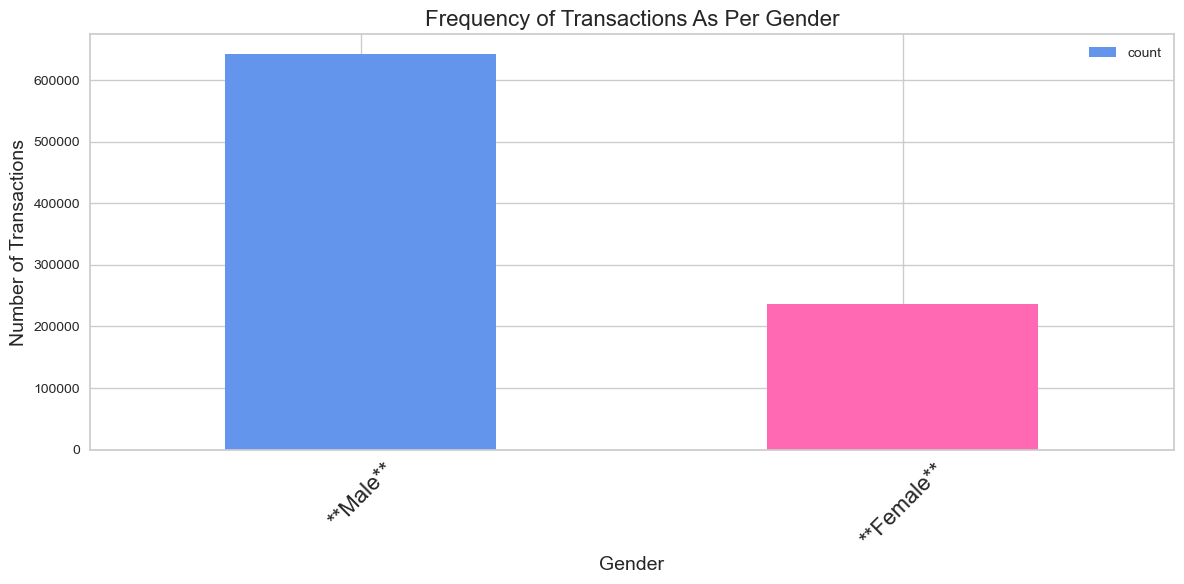

In [361]:
Gender = RMF_data['CustGender'].value_counts().head(15)


def plot_barchart(df):
    """
    Plots a bar chart of transaction frequency by gender.
    """
    plt.figure(figsize=(12, 6))
    df.plot(kind='bar', color=['#6495ED','#FF69B4'],)  
    """Pink and Blue for Male and Female"""
    plt.title('Frequency of Transactions As Per Gender', fontsize=16)
    plt.xlabel('Gender', fontsize=14)
    plt.ylabel('Number of Transactions', fontsize=14)
    plt.xticks(ticks=[0, 1], labels=['**Male**', '**Female**'], rotation=45, fontsize=16)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_barchart(Gender)

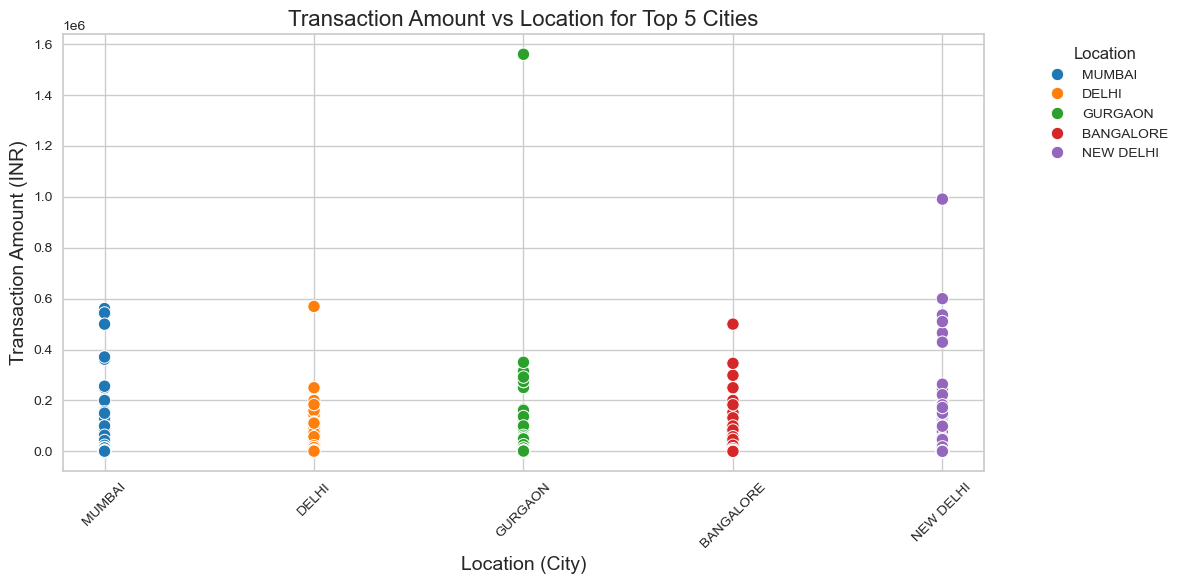

In [341]:
# Get the top 10 cities by transaction count
top_5_cities = RMF_data['CustLocation'].value_counts().head(5).index

#Filter the dataset for the top 10 cities
top_5_data = RMF_data[RMF_data['CustLocation'].isin(top_5_cities)]

''' Plot a scatter plot for TransactionAmount vs Location for the top 5 cities'''
def plot_scatterfig(data):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=data, x='CustLocation', y='TransactionAmount (INR)', hue='CustLocation', palette='tab10', s=80)
    plt.title('Transaction Amount vs Location for Top 5 Cities', fontsize=16)
    plt.xlabel('Location (City)', fontsize=14)
    plt.ylabel('Transaction Amount (INR)', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
plot_scatterfig(top_5_data)

In [65]:
RMF_copied.drop(columns=["CustGender","CustLocation"],inplace=True)
RMF_copied.head(3)

,Frequency,CustAccountBalance,TransactionAmount (INR),CustomerAge,TransactionDate,Recency
0,2,76340.635,2553.0,33,2016-09-17,18
1,1,24204.490,1499.0,22,2016-08-14,0
2,2,100112.950,727.5,32,2016-04-08,182


In [ ]:
mean = RMF_copied.mean()
median = RMF_copied.median()
std = RMF_copied.std()
skew = skew(RMF_copied, axis=0, nan_policy='omit')
kurtosis = kurtosis(RMF_copied, axis=0, nan_policy='omit')

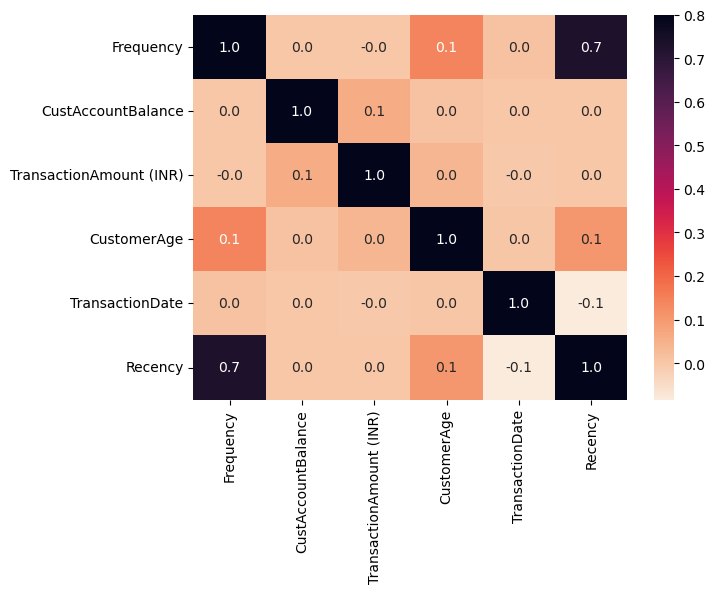

In [67]:
def corr_relation(data):
    """Statstical Graph respresnting relation between features""" 
    plt.figure(figsize=(7,5))
    correlation=data.corr()
    sns.heatmap(correlation,vmin=None,
        vmax=0.8,
        cmap='rocket_r',
        annot=True,
        fmt='.1f',
        linecolor='white',
        cbar=True)
corr_relation(RMF_copied)


In [331]:
RMF_copied_1 = RMF_copied.sample(n=100000, random_state=42)

In [333]:


def linear_function(data):
""" Applying linear regression on to the dataset tp predict TransactionAmount"""

    X = data[['CustAccountBalance', 'CustomerAge', 'Recency']].values

    y = data['TransactionAmount (INR)'].values

    model = LinearRegression()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model.fit(X, y)

    predicted_values = model.predict(X)

    mae = mean_absolute_error(y, predicted_values)

    r_squared = model.score(X, y)

    return predicted_values, model, X, y, model.coef_, model.intercept_, mae, r_squared 


predicted, model,X,y,coef, intercept, mae,r_squared  = linear_function(RMF_copied_1)

print("Predicted Transaction Amounts:", predicted)
print("Model Coefficients:", coef)
print("Model Intercept:", intercept)
print("Mean Absolute Error:", mae)
print("R squared mean error:",r_squared)

runned
Predicted Transaction Amounts: [1451.61824043 1750.06986439 1751.25028185 ... 1447.44391904 1407.76174068
 1482.936423  ]
Model Coefficients: [ 4.73051636e-04  4.42621415e+00 -2.45987898e-01]
Model Intercept: 1318.5061481679495
Mean Absolute Error: 1700.8554251402381
R squared mean error: 0.0055178001215652195


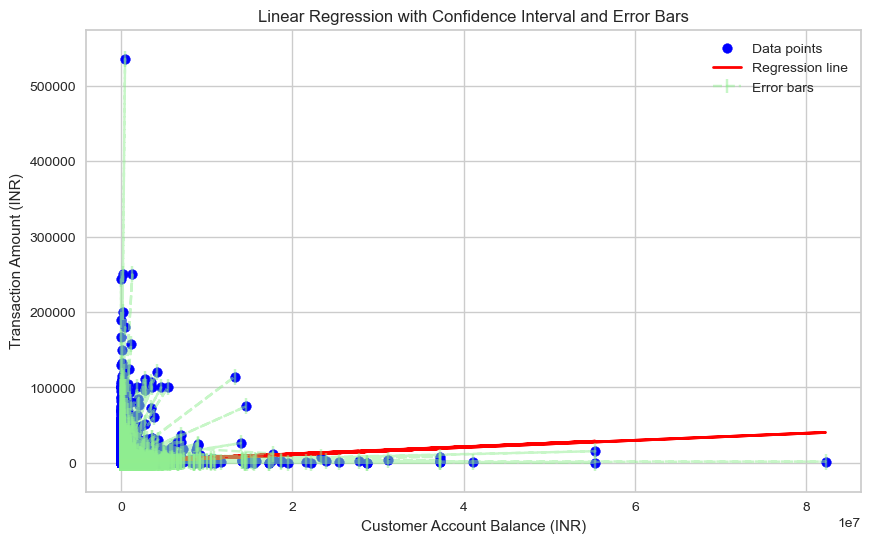

In [367]:
def plot_with_confidence_interval(data, model, X, y):
    """
    Plot the regression line, error bars, and confidence intervals.
    
   """
    predicted_values = model.predict(X)
    residuals = y - predicted_values
    

    std_err = np.std(residuals)
    

    conf_interval = 1.96 * std_err
    

    plt.figure(figsize=(10, 6))
    

    plt.scatter(data['CustAccountBalance'], y, color='blue', label='Data points')

    
    plt.plot(data['CustAccountBalance'], predicted_values, color='red', label='Regression line', linewidth=2)
    

    plt.errorbar(data['CustAccountBalance'], y, yerr=conf_interval, fmt='--', color='lightgreen', alpha=0.5, label='Error bars')
    

    plt.xlabel('Customer Account Balance (INR)')
    plt.ylabel('Transaction Amount (INR)')
    plt.title('Linear Regression with Confidence Interval and Error Bars')
    plt.legend()
    

    plt.grid(True)
    plt.show()

plot_with_confidence_interval(RMF_copied_1, model, X, y)

In [281]:
RMF_copied_2=RMF_data.copy()

In [283]:
RMF_copied2 = RMF_copied_2.sample(n=100000, random_state=42)

In [285]:
RMF_copied2['CustGender'] = le.fit_transform(RMF_copied2['CustGender'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'F': 0, 'M': 1}


In [287]:
scaler = StandardScaler()
numerical_columns = ['CustAccountBalance','TransactionAmount (INR)']


for i in numerical_columns:
    RMF_copied2[i] = scaler.fit_transform(RMF_copied2[[i]])
print(RMF_copied2.head())


        Frequency  CustGender CustLocation  CustAccountBalance  \
758190          1           1    NEW DELHI           -0.160267   
720682          1           1       MUMBAI            0.702357   
463190          2           1    BANGALORE            0.662789   
631662          1           1         JIND           -0.084901   
663324          1           1      GURGAON           -0.104714   

        TransactionAmount (INR)  CustomerAge TransactionDate  Recency  
758190                -0.247646           30      2016-12-08        0  
720682                -0.102529           33      2016-08-23        0  
463190                -0.011518           37      2016-08-22       14  
631662                -0.122368           27      2016-08-21        0  
663324                -0.188129           26      2016-08-09        0  


In [289]:
RMF_copied2 = RMF_copied2.drop(columns = ['CustGender','TransactionDate','CustLocation','Frequency','Recency','CustomerAge'] , axis = 1)

In [291]:
RMF_copied2

,CustAccountBalance,TransactionAmount (INR)
758190,-0.160267,-0.247646
720682,0.702357,-0.102529
463190,0.662789,-0.011518
631662,-0.084901,-0.122368
663324,-0.104714,-0.188129
...,...,...
851418,-0.139948,-0.259586
549566,0.046933,-0.063770
495844,-0.113343,-0.220275
845395,-0.159040,-0.268770


In [293]:
inertia = []
num_clusters = list(range(1,10))

for k in num_clusters:

    kmeans = KMeans(n_clusters = k)

    kmeans.fit(RMF_copied2)

    inertia.append(kmeans.inertia_)

In [295]:
""" Find the elbow spot"""
cost_kneed = KneeLocator(x = num_clusters , y = inertia , S = 1.0 , curve = 'convex' , direction = 'decreasing' , online = True)
K_cost_c3 = cost_kneed.elbow
print('Elbow at k = {} clusters'.format(K_cost_c3))

Elbow at k = 3 clusters


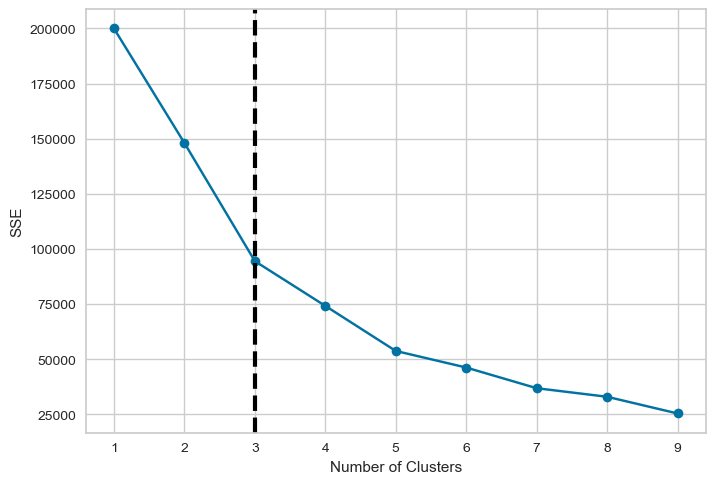

In [365]:
def elbow_function (num_clusters,K_cost_c3):
    """  Elbow Method is a technique used to determine the optimal number of clusters """
    plt.plot(num_clusters , inertia , 'o-')    
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    #plot vertical line at the elbow spot
    plt.axvline(x=K_cost_c3, color='black', label='axvline-fullheight', ls='--', linewidth=3)
elbow_function(num_clusters,K_cost_c3)

In [373]:
columns_names=['CustAccountBalance','TransactionAmount (INR)']
s = StandardScaler()
RMF_copied2 = s.fit_transform(RMF_copied2)
RMF_copied2 = pd.DataFrame(RMF_copied2,columns=columns_names)
RMF_copied2.head()

ValueError: Shape of passed values is (100000, 3), indices imply (100000, 2)

In [297]:
def perform_clustering(data, n_clusters=3):
    """
    Perform clustering on the given data using K-Means.
    """
    # Extract numerical columns for clustering
    features = data.iloc[:, 1:]

    # Scale the data to normalize features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # Fit K-Means model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data['Cluster'] = kmeans.fit_predict(scaled_features)
    centroids = scaler.inverse_transform(kmeans.cluster_centers_)

    return data, kmeans,centroids
clustered_data, model,centroids = perform_clustering(RMF_copied2, n_clusters=3)
print(clustered_data)


        CustAccountBalance  TransactionAmount (INR)  Cluster
758190           -0.160267                -0.247646        0
720682            0.702357                -0.102529        0
463190            0.662789                -0.011518        0
631662           -0.084901                -0.122368        0
663324           -0.104714                -0.188129        0
...                    ...                      ...      ...
851418           -0.139948                -0.259586        0
549566            0.046933                -0.063770        0
495844           -0.113343                -0.220275        0
845395           -0.159040                -0.268770        0
597572           -0.078921                -0.255177        0

[100000 rows x 3 columns]
ttt


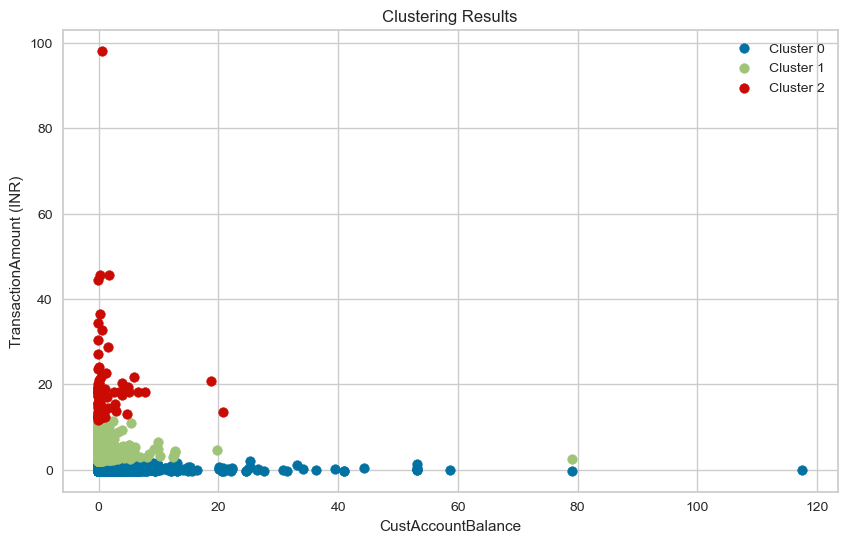

In [325]:
def cluster_plot(data, clustered_data, cluster_column='Cluster'):
    """
    Plots clustering results with a legend for different clusters.
    """
    # Create a scatter plot for each cluster
    unique_clusters = clustered_data[cluster_column].unique()
    plt.figure(figsize=(10, 6))
    
    for cluster in unique_clusters:
        cluster_points = clustered_data[clustered_data[cluster_column] == cluster]
        plt.scatter(
            cluster_points['CustAccountBalance'], 
            cluster_points['TransactionAmount (INR)'], 
            label=f'Cluster {cluster}'
        )
    
    plt.xlabel('CustAccountBalance')
    plt.ylabel('TransactionAmount (INR)')
    plt.title('Clustering Results')
    plt.legend()  
    plt.grid(True)
    plt.show()


cluster_plot(RMF_copied2, clustered_data)


''' END'''